# Sesi 10

Inferential Statistics

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt

import seaborn as sns
sns.set(color_codes=True) # Styling
sns.set(rc={'figure.figsize':(5, 5)}) # default ukuran canvas

## Probability Distribution

### Uniform Distribution

In [2]:
from scipy.stats import uniform

n = 10000
start = 10
width = 20

data_uniform = uniform.rvs(size=n, loc=start, scale=width)

In [3]:
data_uniform

array([14.98357149, 29.87722919, 26.08490594, ..., 26.97274853,
       22.64138058, 14.10177503])

[Text(0.5, 0, 'Uniform Distribution'), Text(0, 0.5, 'Frequency')]

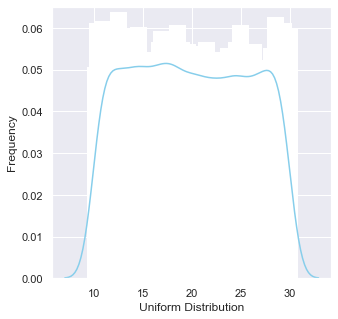

In [9]:
ax = sns.distplot(data_uniform,
                 bins=100,
                 kde=True,
                 color='skyblue',
                 hist_kws={'linewidth': 15, 'alpha':1})

ax.set(xlabel='Uniform Distribution', ylabel='Frequency')

### Normal Distribution

In [10]:
from scipy.stats import norm

data_normal = norm.rvs(size=10000, loc=0, scale=1)

In [11]:
data_normal

array([ 1.59289783,  1.09365515,  0.94132495, ...,  1.10029263,
        0.48818829, -0.73075798])

[Text(0.5, 0, 'Normal Distribution'), Text(0, 0.5, 'Frequency')]

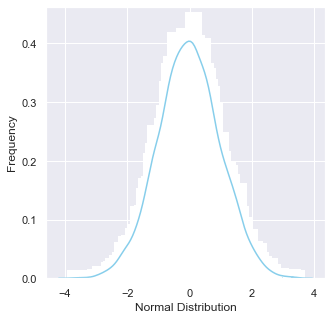

In [12]:
ax = sns.distplot(data_normal,
                 bins=100,
                 kde=True,
                 color='skyblue',
                 hist_kws={'linewidth': 15, 'alpha':1})

ax.set(xlabel='Normal Distribution', ylabel='Frequency')

### Exponential Distribution

In [13]:
from scipy.stats import expon

data_expon = expon.rvs(scale=1, loc=0, size=1000)

[Text(0.5, 0, 'Exponential Distribution'), Text(0, 0.5, 'Frequency')]

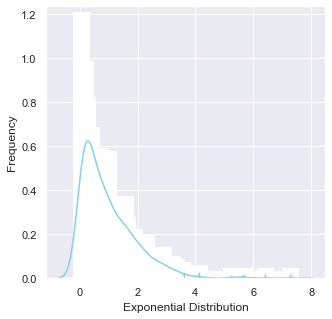

In [14]:
ax = sns.distplot(data_expon,
                 bins=100,
                 kde=True,
                 color='skyblue',
                 hist_kws={'linewidth': 15, 'alpha':1})

ax.set(xlabel='Exponential Distribution', ylabel='Frequency')

### Poisson Distribution

In [15]:
from scipy.stats import poisson
data_poisson = poisson.rvs(mu=3, size=10000)

In [16]:
data_poisson

array([4, 2, 2, ..., 2, 3, 3])

[Text(0.5, 0, 'Poisson Distribution'), Text(0, 0.5, 'Frequency')]

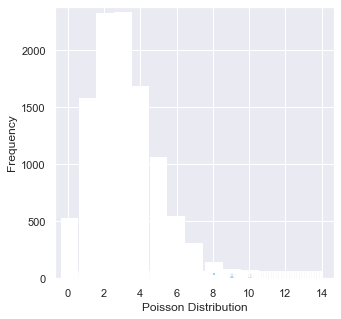

In [18]:
ax = sns.distplot(data_poisson,
                 bins=100,
                 kde=False,
                 color='skyblue',
                 hist_kws={'linewidth': 15, 'alpha':1})

ax.set(xlabel='Poisson Distribution', ylabel='Frequency')

### Binomial Distribution

In [19]:
from scipy.stats import binom

data_binom = binom.rvs(n=10, p=0.8, size=10000)

[Text(0.5, 0, 'Binomial Distribution'), Text(0, 0.5, 'Frequency')]

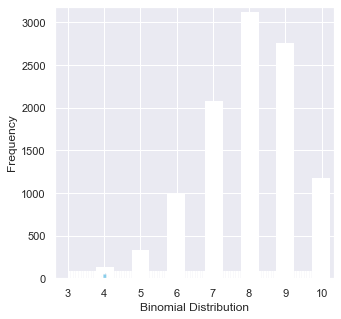

In [20]:
ax = sns.distplot(data_binom,
                 bins=100,
                 kde=False,
                 color='skyblue',
                 hist_kws={'linewidth': 15, 'alpha':1})

ax.set(xlabel='Binomial Distribution', ylabel='Frequency')

### Bernoulli Distribution

In [21]:
from scipy.stats import bernoulli

data_bern = bernoulli.rvs(size=10000, p=0.6)

[Text(0.5, 0, 'Bernoulli Distribution'), Text(0, 0.5, 'Frequency')]

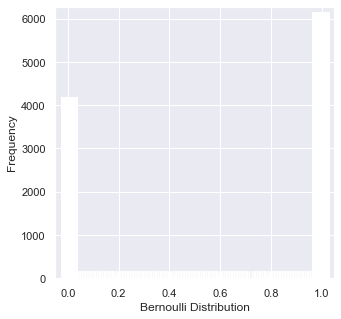

In [22]:
ax = sns.distplot(data_bern,
                 bins=100,
                 kde=False,
                 color='skyblue',
                 hist_kws={'linewidth': 15, 'alpha':1})

ax.set(xlabel='Bernoulli Distribution', ylabel='Frequency')

## Confidence Interval

In [23]:
import pandas as pd
import numpy as np

df = pd.read_csv('dataset/heart.csv')

In [24]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [25]:
df['Sex1'] = df.sex.replace({1: 'Male', 0: 'Female'})

In [26]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Sex1
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,Male
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,Male
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,Male
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,Male
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,Female


In [27]:
df.groupby('Sex1').agg({'chol': [np.mean, np.std, np.size]})

chol                
              mean        std size
Sex1                              
Female  261.455128  64.466781  312
Male    239.237027  43.155535  713

In [28]:
mean_fe = 261.45
sd = 64.4
n = 312
z = 1.96 #95% confidence

In [29]:
se = sd / np.sqrt(n)

In [30]:
low_CI = mean_fe - z * se
hi_CI = mean_fe + z * se

low_CI, hi_CI

(254.3039731821066, 268.59602681789335)

Dengan confidence level sebanyak 95% percaya bahwa rata-rata tingkat kolesterol wanita ada di antara 254.303 sampai 268.596

## Hypothesis Testing

In [31]:
da = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/nhanes_2015_2016.csv')

In [32]:
da.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


In [33]:
females = da[
    da['RIAGENDR'] == 2
]

male = da[
    da['RIAGENDR'] == 1
]

In [34]:
n1 = len(females)
mu1 = females['BMXBMI'].mean()
sd1 = females['BMXBMI'].std()

n1, mu1, sd1

(2976, 29.93994565217392, 7.753318809545674)

In [35]:
n2 = len(male)
mu2 = male['BMXBMI'].mean()
sd2 = male['BMXBMI'].std()

n2, mu2, sd2

(2759, 28.778072111846942, 6.2525676168014614)

In [37]:
import statsmodels.api as sm

In [38]:
sm.stats.ztest(
    females['BMXBMI'].dropna(),
    male['BMXBMI'].dropna()
)

(6.1755933531383205, 6.591544431126401e-10)

p-value = 6.59e-10, lebih kecil daripada alpha yaitu 0.05 atau 5%.
Reject null hypothesis, bahwa BMI male sama dengan BMI female. Menerima alternative hypothesis yaitu BMI male tidak sama dengan BMI female.